/var/folders/c3/1jkjmwxx5vncr00sw0gklknr0000gp/T/ipykernel_53089/623388419.py:16: RuntimeWarning: divide by zero encountered in log
  z_estimates = alpha_range**2 / (-2 * np.log(empirical_probs))
/var/folders/c3/1jkjmwxx5vncr00sw0gklknr0000gp/T/ipykernel_53089/623388419.py:47: RuntimeWarning: divide by zero encountered in log10
  plt.plot(alpha_range, np.log10(empirical_probs_gaussian), 'o-', label='Empirical log10(Q(α))')


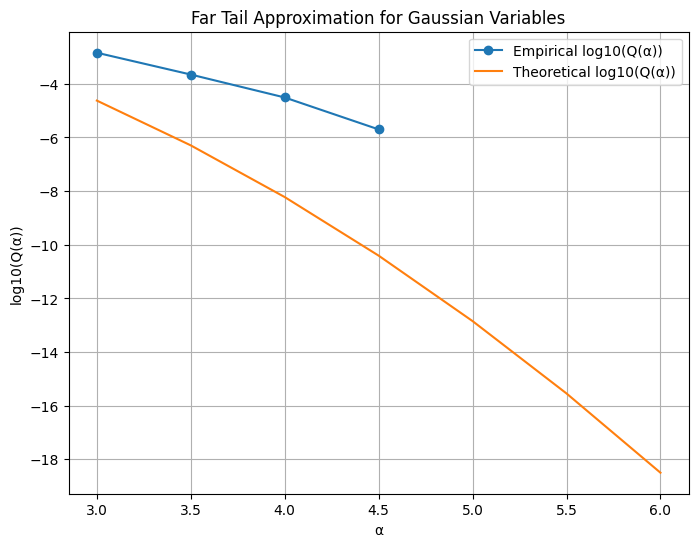

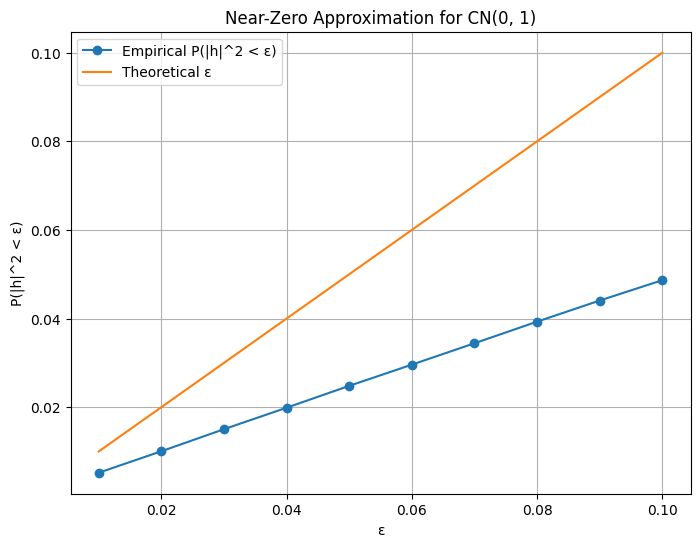

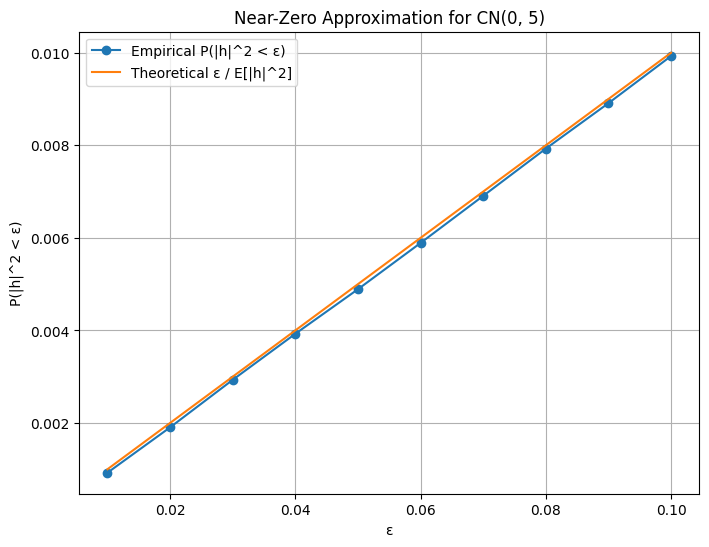

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, chi2

# Parameters
n_samples = 10**6
sigma_gaussian = 1.0
sigma_cn5 = np.sqrt(5)
alpha_range = np.arange(3.0, 6.5, 0.5)
epsilon_range = np.arange(0.01, 0.11, 0.01)

# Far-tail approximation for Gaussian
def gaussian_far_tail_experiment(n_samples, sigma, alpha_range):
    samples = np.random.normal(0, sigma, n_samples)
    empirical_probs = np.array([np.sum(samples > alpha) / n_samples for alpha in alpha_range])
    z_estimates = alpha_range**2 / (-2 * np.log(empirical_probs))
    return empirical_probs, z_estimates

empirical_probs_gaussian, z_estimates = gaussian_far_tail_experiment(n_samples, sigma_gaussian, alpha_range)

# Near-zero behavior for CN(0, 1)
def near_zero_behavior_experiment(n_samples, sigma, epsilon_range):
    real_part = np.random.normal(0, sigma, n_samples)
    imag_part = np.random.normal(0, sigma, n_samples)
    magnitudes = real_part**2 + imag_part**2
    empirical_probs = np.array([np.sum(magnitudes < epsilon) / n_samples for epsilon in epsilon_range])
    theoretical_probs = epsilon_range
    return empirical_probs, theoretical_probs

empirical_probs_cn1, theoretical_probs_cn1 = near_zero_behavior_experiment(n_samples, sigma_gaussian, epsilon_range)

# Near-zero behavior for CN(0, 5)
def near_zero_behavior_cn5_experiment(n_samples, sigma, epsilon_range):
    real_part = np.random.normal(0, sigma, n_samples)
    imag_part = np.random.normal(0, sigma, n_samples)
    magnitudes = real_part**2 + imag_part**2
    empirical_probs = np.array([np.sum(magnitudes < epsilon) / n_samples for epsilon in epsilon_range])
    theoretical_probs = epsilon_range / (2 * sigma**2)
    return empirical_probs, theoretical_probs

empirical_probs_cn5, theoretical_probs_cn5 = near_zero_behavior_cn5_experiment(n_samples, sigma_cn5, epsilon_range)

# Plotting

# Far-Tail Approximation for Gaussian
plt.figure(figsize=(8, 6))
plt.plot(alpha_range, np.log10(empirical_probs_gaussian), 'o-', label='Empirical log10(Q(α))')
plt.plot(alpha_range, np.log10(np.exp(-alpha_range**2 / (2 * np.mean(z_estimates)))), '-', label='Theoretical log10(Q(α))')
plt.xlabel("α")
plt.ylabel("log10(Q(α))")
plt.title("Far Tail Approximation for Gaussian Variables")
plt.grid(True)
plt.legend()

# Near-Zero Approximation for CN(0, 1)
plt.figure(figsize=(8, 6))
plt.plot(epsilon_range, empirical_probs_cn1, 'o-', label='Empirical P(|h|^2 < ε)')
plt.plot(epsilon_range, theoretical_probs_cn1, '-', label='Theoretical ε')
plt.xlabel("ε")
plt.ylabel("P(|h|^2 < ε)")
plt.title("Near-Zero Approximation for CN(0, 1)")
plt.grid(True)
plt.legend()

# Near-Zero Approximation for CN(0, 5)
plt.figure(figsize=(8, 6))
plt.plot(epsilon_range, empirical_probs_cn5, 'o-', label='Empirical P(|h|^2 < ε)')
plt.plot(epsilon_range, theoretical_probs_cn5, '-', label='Theoretical ε / E[|h|^2]')
plt.xlabel("ε")
plt.ylabel("P(|h|^2 < ε)")
plt.title("Near-Zero Approximation for CN(0, 5)")
plt.grid(True)
plt.legend()

plt.show()